CREDIT SCORE CLASSIFICATION_KUMBHAR: Building a system to automate credit scoring using a person's credit-related information to classify into different credit score brackets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
credit_data = pd.read_csv('credit_score.csv', low_memory=False)
credit_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


We immediately notice some columns that are not needed for our purpose. Let's remove them.

In [3]:
credit_data = credit_data.drop(columns=['ID','Customer_ID','Name','SSN','Type_of_Loan','Credit_History_Age'])
credit_data.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
credit_data.shape

(100000, 22)

In [5]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [6]:
credit_data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [7]:
# Checking missing values
credit_data.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

DATA CLEANING

In [17]:
# Replacing the special characters with empty string or null values
# Converting to int or float datatype
# Converting categorical values to int values

credit_data['Age'] = credit_data['Age'].astype(str).str.replace("_","") # Age columns contains data with _ added to some integers
credit_data['Age'] = credit_data['Age'].astype(int)

credit_data['Occupation'] = credit_data['Occupation'].replace("_______",np.nan)

credit_data['Annual_Income'] = credit_data['Annual_Income'].astype(str).str.replace("_","")
credit_data['Annual_Income'] = credit_data['Annual_Income'].astype(float)

credit_data['Num_of_Loan'] = credit_data['Num_of_Loan'].astype(str).str.replace("_","")
credit_data['Num_of_Loan'] = credit_data['Num_of_Loan'].astype(int)

credit_data['Num_of_Delayed_Payment'] = credit_data['Num_of_Delayed_Payment'].astype(str).str.replace("_","")
credit_data['Num_of_Delayed_Payment'] = credit_data['Num_of_Delayed_Payment'].astype(float)

credit_data['Changed_Credit_Limit'] = credit_data['Changed_Credit_Limit'].replace("_",np.nan)
credit_data['Changed_Credit_Limit'] = credit_data['Changed_Credit_Limit'].astype(float)

credit_data['Credit_Mix'] = credit_data['Credit_Mix'].replace("_",np.nan)
credit_data['Credit_Mix'] = credit_data['Credit_Mix'].replace(["Bad","Standard","Good"],[0,1,2])

credit_data['Outstanding_Debt'] = credit_data['Outstanding_Debt'].astype(str).str.replace("_","")
credit_data['Outstanding_Debt'] = credit_data['Outstanding_Debt'].astype(float)

credit_data['Payment_of_Min_Amount'] = credit_data['Payment_of_Min_Amount'].astype(str).str.replace("NM","No")
credit_data['Payment_of_Min_Amount'] = credit_data['Payment_of_Min_Amount'].replace(["No","Yes"],[0,1])
credit_data['Payment_of_Min_Amount'] = credit_data['Payment_of_Min_Amount'].astype(int)

credit_data['Amount_invested_monthly'] = credit_data['Amount_invested_monthly'].astype(str).str.replace("_","")
credit_data['Amount_invested_monthly'] = credit_data['Amount_invested_monthly'].astype(float)

credit_data['Payment_Behaviour'] = credit_data['Payment_Behaviour'].replace("!@9#%8",np.nan)

credit_data['Monthly_Balance'] = credit_data['Monthly_Balance'].astype(str).str.replace("_","")
credit_data['Monthly_Balance'] = credit_data['Monthly_Balance'].astype(float)

credit_data['Credit_Score'] = credit_data['Credit_Score'].replace(["Poor","Standard","Good"],[0,1,2])
credit_data['Credit_Score'] = credit_data['Credit_Score'].astype(int)

In [18]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int32  
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                79805 non-null   fl

In [19]:
credit_data.isnull().sum()

Month                           0
Age                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [20]:
# Forward and backward filling null values
credit_data = credit_data.fillna(method = 'ffill')
credit_data = credit_data.fillna(method = 'bfill')

credit_data.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

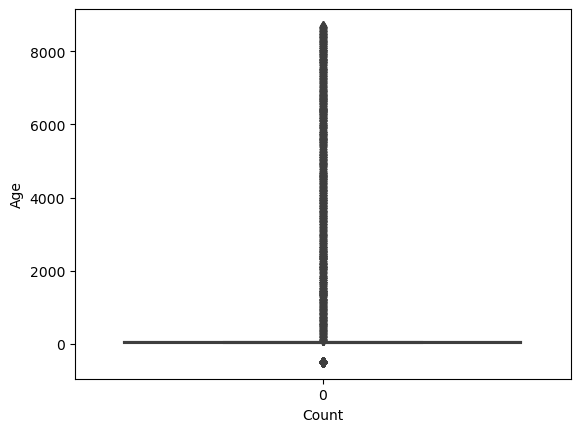

In [26]:
# Notice some age values are negative and general outliers in the data
# Treating those as outliers and removing them

sns.boxplot(credit_data['Age'])
plt.xlabel('Count')
plt.ylabel('Age')
plt.show()

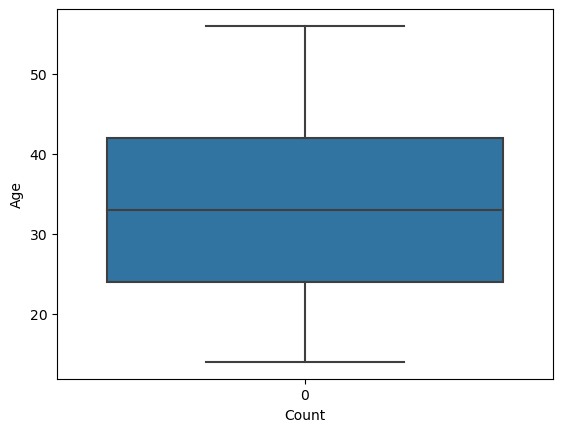

In [27]:
# Using the IQR method to remove age outlier

Q1 = credit_data.Age.quantile(0.25)
Q3 = credit_data.Age.quantile(0.75)
IQR = Q3-Q1
data = credit_data[(credit_data.Age >= Q1 - 1.5*IQR) & (credit_data.Age <= Q3 + 1.5*IQR)]
sns.boxplot(data["Age"])
plt.xlabel('Count')
plt.ylabel('Age')
plt.show()

In [31]:
# Performing one hot encoding for categorical values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

credit_data['Month'] = le.fit_transform(credit_data['Month'])
credit_data['Occupation'] = le.fit_transform(credit_data['Occupation'])
credit_data['Payment_Behaviour'] = le.fit_transform(credit_data['Payment_Behaviour'])

credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  int32  
 2   Occupation                100000 non-null  int64  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  fl

FEATURE SELECTION using VIF

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []

for col in credit_data.columns:
    if((credit_data[col].dtype != 'object') & (col != 'Credit_Score')):
        col_list.append(col)
        
X = credit_data[col_list]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                     Feature       VIF
0                      Month  0.300012
1                        Age  0.974661
2                 Occupation  0.277722
3              Annual_Income  0.985001
4      Monthly_Inhand_Salary  0.365970
5          Num_Bank_Accounts  0.979247
6            Num_Credit_Card  0.970567
7              Interest_Rate  0.976430
8                Num_of_Loan  0.997697
9        Delay_from_due_date  0.332213
10    Num_of_Delayed_Payment  0.981707
11      Changed_Credit_Limit  0.299307
12      Num_Credit_Inquiries  0.979793
13                Credit_Mix  0.321474
14          Outstanding_Debt  0.396141
15  Credit_Utilization_Ratio  0.024506
16     Payment_of_Min_Amount  0.476749
17       Total_EMI_per_month  0.972258
18   Amount_invested_monthly  0.911321
19         Payment_Behaviour  0.310525
20           Monthly_Balance  1.000207


All VIF values are under 5. So we will select all the features.

LOGISTIC REGRESSION

In [41]:
X = credit_data.drop(columns=['Credit_Score'])
y = credit_data['Credit_Score']

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_pred = lr.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
pd.DataFrame({"Actual Value: ":y_test, "Predicted Value: ":y_pred})

Accuracy Score:  0.61855


,Actual Value:,Predicted Value:
75721,2,2
80184,0,0
19864,2,2
76699,0,0
92991,2,2
...,...,...
32595,1,1
29313,1,1
37862,0,1
53421,1,1


The accuracy of the Logistic Regression model is 61.86 percent

DECISION TREE CLASSIFIER

In [44]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
y_pred = dt.predict(X_test)
print("Accuracy Score (Decision Tree): ",accuracy_score(y_test,y_pred))

Accuracy Score (Decision Tree):  0.695


Accuracy of the Decision Tree Classifier (69.5 percent) is higher than logistic regression model

In [50]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_features': ['log2','sqrt'],
              'criterion': ['entropy','gini'],
              'max_depth': [2,3,5,10,50],
              'min_samples_split': [2,3,50,100],
              'min_samples_leaf':[1,5,8,10]}

grid_obj = GridSearchCV(dt, parameters)
grid_obj = grid_obj.fit(X_train,y_train)

dt = grid_obj.best_estimator_
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc_dt = round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy after hyperparameter tuning (Decision Tree): ",acc_dt)

D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
800 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "D:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_par

Accuracy after hyperparameter tuning (Decision Tree):  70.93


RANDOM FOREST CLASSIFIER

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

print("Accuracy Score (Random Forest): ",accuracy_score(y_test,y_pred))

Accuracy Score (Random Forest):  0.79705


The Accuracy for Random Forest Classifier is the highest at 79.71 percent